In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Let's import our data! 

In [29]:
df = pd.read_csv('./Data/train.csv') ## Train data
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [30]:
fc = pd.read_csv('./Data/fulfilment_center_info.csv') ## fulfilment_center_info
fc.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [31]:
mi = pd.read_csv('./Data/meal_info.csv') ## meal_info

In [32]:
mi['cusine_name'] = mi['cuisine'] + ' ' +mi['category']

In [34]:
mi.head()

,meal_id,category,cuisine,cusine_name
0,1885,Beverages,Thai,Thai Beverages
1,1993,Beverages,Thai,Thai Beverages
2,2539,Beverages,Thai,Thai Beverages
3,1248,Beverages,Indian,Indian Beverages
4,2631,Beverages,Indian,Indian Beverages


### Let's Understand our data

### 1. Fullfilment Center

In [35]:
fc.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [80]:
print(fc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB
None


In [37]:
fc.describe().T

,count,mean,std,min,25%,50%,75%,max
center_id,77.0,83.142857,46.090219,10.0,50.0,77.0,110.0,186.0
city_code,77.0,600.662338,66.720274,456.0,553.0,596.0,651.0,713.0
region_code,77.0,56.493506,18.126473,23.0,34.0,56.0,77.0,93.0
op_area,77.0,3.985714,1.106406,0.9,3.5,3.9,4.4,7.0


In [38]:
# fc.isnull().sum() ## No Nulls

### Data Distribution for Operational area

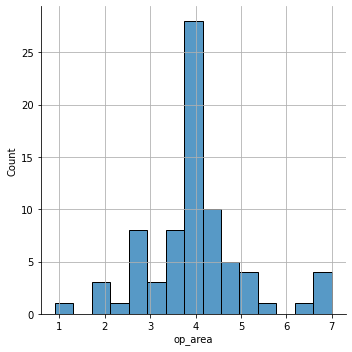

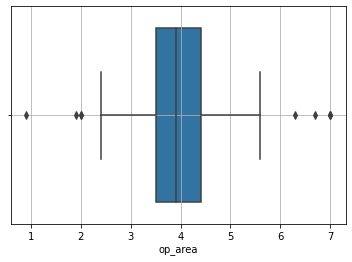

In [39]:
sns.displot(fc.op_area)
plt.grid()
plt.show()
sns.boxplot(data = fc, x = 'op_area')
plt.grid()
plt.show()

### Count of center types

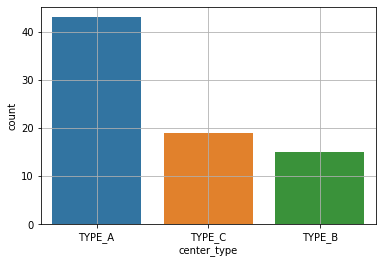

In [40]:
sns.countplot(data = fc,x = 'center_type',order=fc.center_type.value_counts().index)
plt.grid()
plt.show()

### "Operational Area" averages WRT "center types"

In [41]:
fc.op_area.groupby(fc.center_type).mean().sort_values(ascending=False)

center_type
TYPE_B    4.773333
TYPE_A    4.076744
TYPE_C    3.157895
Name: op_area, dtype: float64

### 2. Meal Info

In [42]:
mi.head()

,meal_id,category,cuisine,cusine_name
0,1885,Beverages,Thai,Thai Beverages
1,1993,Beverages,Thai,Thai Beverages
2,2539,Beverages,Thai,Thai Beverages
3,1248,Beverages,Indian,Indian Beverages
4,2631,Beverages,Indian,Indian Beverages


In [43]:
mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   meal_id      51 non-null     int64 
 1   category     51 non-null     object
 2   cuisine      51 non-null     object
 3   cusine_name  51 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [44]:
# mi.isnull().sum() ## No Nulls

### Count of the Category

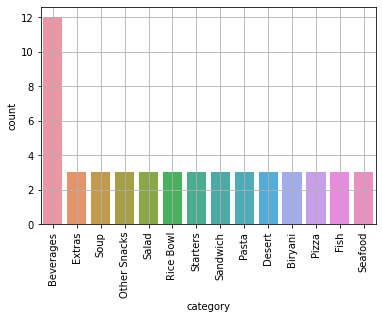

In [45]:
sns.countplot(data = mi, x = 'category')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Count of cuisines! 

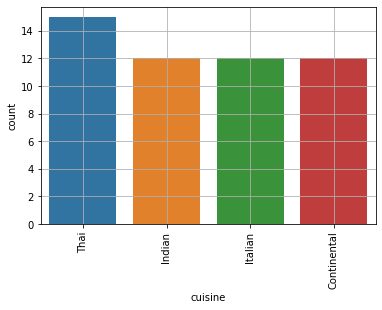

In [46]:
sns.countplot(data = mi, x = 'cuisine')
plt.xticks(rotation=90)
plt.grid()
plt.show()

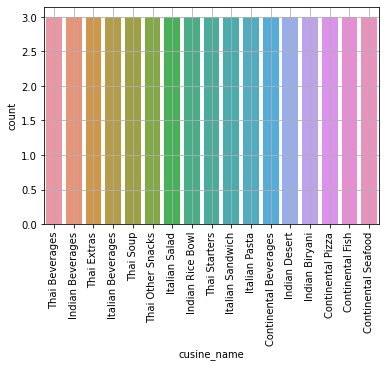

In [47]:
sns.countplot(data = mi, x = 'cusine_name')
plt.xticks(rotation=90)
plt.grid()
plt.show()

### Train data!

In [48]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [50]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,456548.0,1250096.31,144354.82,1000000.00,1124998.75,1250183.50,1375140.25,1499999.00
week,456548.0,74.77,41.52,1.00,39.00,76.00,111.00,145.00
center_id,456548.0,82.11,45.98,10.00,43.00,76.00,110.00,186.00
meal_id,456548.0,2024.34,547.42,1062.00,1558.00,1993.00,2539.00,2956.00
checkout_price,456548.0,332.24,152.94,2.97,228.95,296.82,445.23,866.27
base_price,456548.0,354.16,160.72,55.35,243.50,310.46,458.87,866.27
emailer_for_promotion,456548.0,0.08,0.27,0.00,0.00,0.00,0.00,1.00
homepage_featured,456548.0,0.11,0.31,0.00,0.00,0.00,0.00,1.00
num_orders,456548.0,261.87,395.92,13.00,54.00,136.00,324.00,24299.00


In [51]:
# df.isnull().sum() ## No Null Data

In [52]:
for i in df.columns:
    if df[i].dtype != 'object':
        print(i)

id
week
center_id
meal_id
checkout_price
base_price
emailer_for_promotion
homepage_featured
num_orders


### Data Analysis

### Heat map of correlations

<AxesSubplot:>

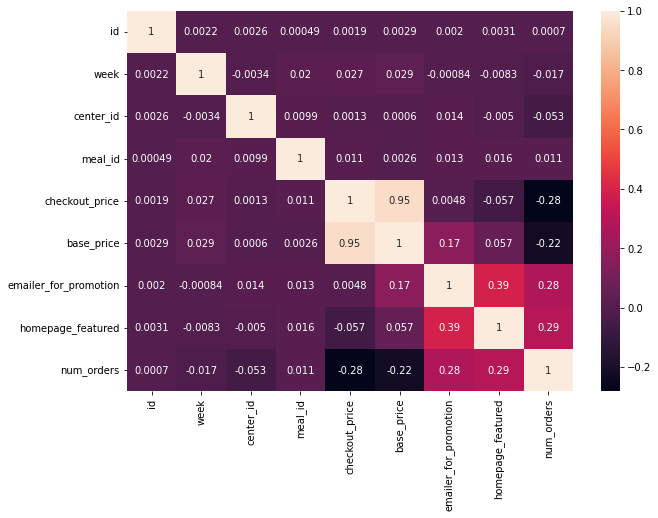

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

### Lets see what affects the number of orders! 

### Lets see if the number of orders are going higer / lower

In [99]:
week_numo = pd.DataFrame(df.num_orders.groupby(df.week).mean())

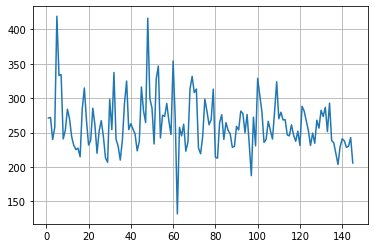

In [102]:
plt.plot(week_numo.index,week_numo.num_orders)
plt.grid()
plt.show()

### We can roughly see a downward trend in the number of orders

### Let's check if the Center ID affects the number of orders

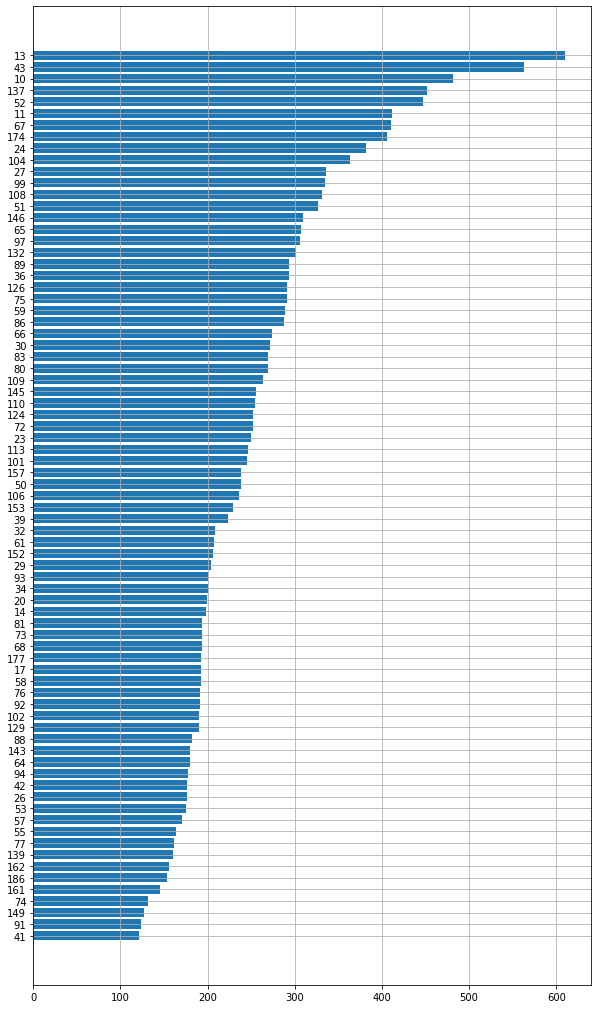

In [119]:
cid_numo = pd.DataFrame(df.num_orders.groupby(df.center_id).mean().sort_values())
cid_numo.index = cid_numo.index.astype(str)
plt.figure(figsize=(10,18))
plt.barh(cid_numo.index,cid_numo.num_orders)
plt.grid()
plt.show()

### Does checkout prices affect the order number ?

Q1 : 228.95
Q2 : 296.82
Q3 : 445.23
Upper limit : 769.6500000000001
lower limit : -95.47000000000008


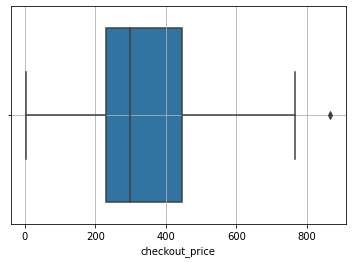

In [94]:
sns.boxplot(df.checkout_price)
plt.grid()

q1 = np.percentile(df.checkout_price,25,interpolation='midpoint')
q2 = df.checkout_price.median()
q3 = np.percentile(df.checkout_price,75,interpolation='midpoint')
iqr = q3-q1
ul = q3+(1.5*iqr)
ll = q1-(1.5*iqr)

print('Q1 :',q1)
print('Q2 :',q2)
print('Q3 :',q3)
print('Upper limit :',ul)
print('lower limit :',ll)

In [121]:
cpc = []
for i in df.checkout_price:
    if i < q1:
        cpc.append('cheap')
    elif q1 <= i < q3:
        cpc.append('moderate')
    elif i >= q3:
        cpc.append('costly')
df['checkout_price_catg'] = cpc

In [122]:
col = df.pop('checkout_price_catg')
df.insert(5,'checkout_price_catg',col)

In [131]:
pd.DataFrame(df.num_orders.groupby(df.checkout_price_catg).sum().sort_values(ascending=False))

,num_orders
checkout_price_catg,
moderate,58142826
cheap,48676245
costly,12738414


### We can infer that the moderately priced products have been sold the highest! The sum of the number of orders is highest for the moderately priced food products.

### Let's see if the "emailer for promotion" has played any role.

                       num_orders
emailer_for_promotion            
0                      229.262883
1                      631.097544


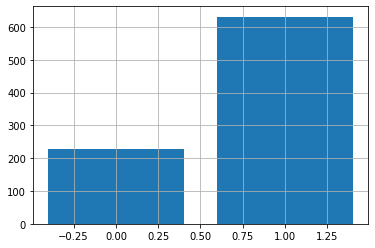

In [143]:
efp_numo = pd.DataFrame(df.num_orders.groupby(df.emailer_for_promotion).mean())
plt.bar(efp_numo.index,efp_numo.num_orders)
plt.grid()
print(efp_numo)
plt.show()

### We can see the average number of orders are significantly higher when emailer for promotion is 1

### Let's see if the "homepage_featured" has played any role.

                   num_orders
homepage_featured            
0                  221.050040
1                  594.884786


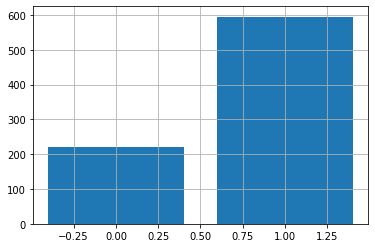

In [145]:
efp_numo = pd.DataFrame(df.num_orders.groupby(df.homepage_featured).mean())
plt.bar(efp_numo.index,efp_numo.num_orders)
plt.grid()
print(efp_numo)
plt.show()

### We can see the average number of orders are significantly higher when "homepage_featured" is 1

### Let's now add the Center type feature from our fullfillment center data

In [151]:
ctype_id = fc.center_id.unique().tolist()
ctype_list = fc.center_type.to_list()
df['center_type'] = df['center_id']
df['center_type'].replace(ctype_id,ctype_list,True)

In [172]:
pd.DataFrame(df.num_orders.groupby(df.center_type).mean().sort_values(ascending=False))

,num_orders
center_type,
TYPE_B,318.856145
TYPE_A,262.394456
TYPE_C,206.670097


In [174]:
pd.DataFrame(fc.op_area.groupby(fc.center_type).mean().sort_values(ascending=False))

,op_area
center_type,
TYPE_B,4.773333
TYPE_A,4.076744
TYPE_C,3.157895


### Type B centers have more operational area and also higher number of orders! 

### Lets add meal infromation to our data

In [185]:
mid = mi.meal_id.unique()
mlist = mi.cusine_name.to_list()
df['cusine_name'] = df['meal_id']
df['cusine_name'].replace(mid,mlist,True)

### Let's see which cusine names have the highest average of number of orders

In [197]:
cname_numo = pd.DataFrame(df.num_orders.groupby(df.cusine_name).mean().sort_values(ascending=True))
cname_numo.index = cname_numo.index.astype(str)

                       num_orders
cusine_name                      
Indian Rice Bowl       624.822288
Thai Beverages         558.425855
Italian Sandwich       529.776276
Italian Beverages      418.021329
Italian Salad          383.218460
Thai Extras            293.834169
Continental Pizza      222.817309
Continental Beverages  182.559624
Thai Other Snacks      162.234691
Thai Starters          155.276110
Continental Seafood    100.895898
Continental Fish        85.595268
Thai Soup               82.023353
Indian Beverages        80.075061
Indian Desert           66.250905
Italian Pasta           59.137142
Indian Biryani          30.651402


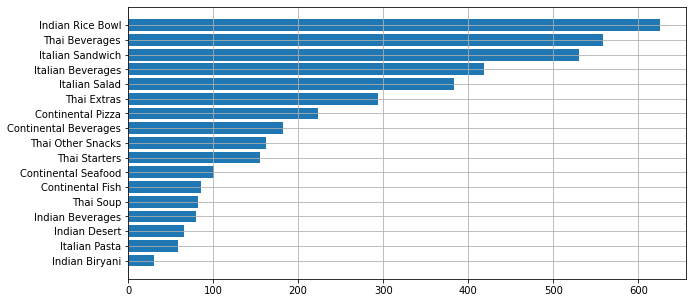

In [203]:
plt.figure(figsize=(10,5))
plt.barh(cname_numo.index, cname_numo.num_orders)
plt.grid()
print(cname_numo.sort_values('num_orders',ascending=False))
plt.show()

In [186]:
df.head()

,id,week,center_id,meal_id,checkout_price,checkout_price_catg,base_price,emailer_for_promotion,homepage_featured,num_orders,center_type,cusine_name
0,1379560,1,55,1885,136.83,cheap,152.29,0,0,177,TYPE_C,Thai Beverages
1,1466964,1,55,1993,136.83,cheap,135.83,0,0,270,TYPE_C,Thai Beverages
2,1346989,1,55,2539,134.86,cheap,135.86,0,0,189,TYPE_C,Thai Beverages
3,1338232,1,55,2139,339.50,moderate,437.53,0,0,54,TYPE_C,Indian Beverages
4,1448490,1,55,2631,243.50,moderate,242.50,0,0,40,TYPE_C,Indian Beverages


In [84]:
test = pd.read_csv('./Data/test_QoiMO9B.csv')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
